In [49]:
import sys
sys.path.append('/Users/benj/Documents/SpEC-class')
import SEC_Class as sp
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
from scipy import signal


# import the SpEC data before the benchmark


In [108]:
# AndorPath is the current working directory
# CV_path is the current working directory
AndorPath = os.getcwd()
CV_path = os.getcwd()
# join andorpath with ANDORSPEC-0.0.0.0__0.pkl
AndorPath = os.path.join(AndorPath, "ANDORSPEC-0.0.0.0__0.pkl")
CV_path = os.path.join(CV_path, "CV-3.3.0.0__0.csv")

print(AndorPath, "\n", CV_path)     

/Users/benj/Documents/IrBenchmark/1mVs-1-2cycles/ANDORSPEC-0.0.0.0__0.pkl 
 /Users/benj/Documents/IrBenchmark/1mVs-1-2cycles/CV-3.3.0.0__0.csv


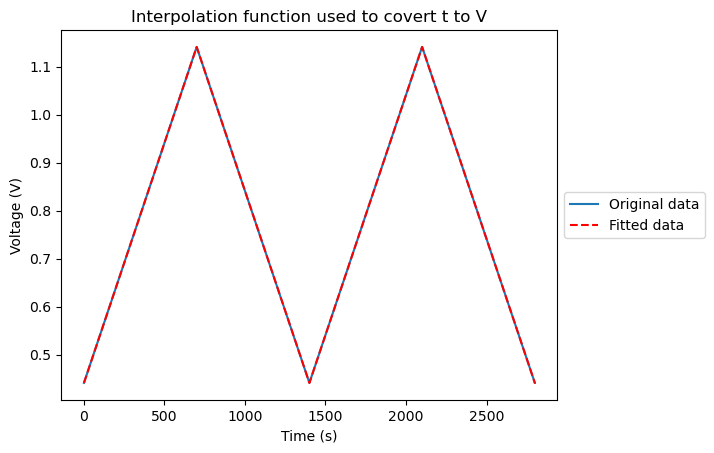

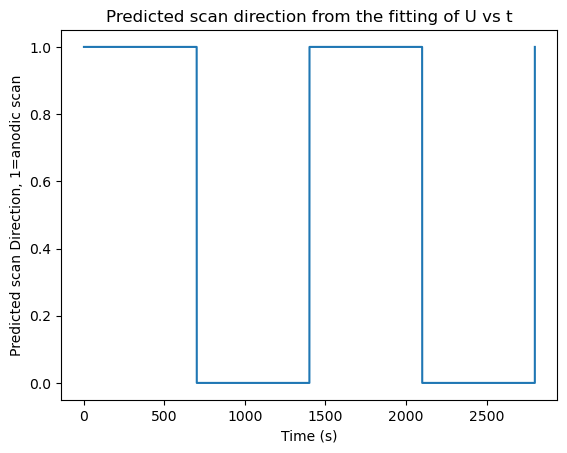

In [109]:
# get in the first spectral object which is for the bentham light source
SpEC1 = sp.SpEC()
SpEC1.read_CV(CV_path);
SpEC1.generate_interpolation_function();
SpEC1.read_Andorspec(AndorPath);
SpEC1.Calibrate_Andorspec();
SpEC1.populate_spec_scans();
SpEC1.populate_CV_scans();


In [118]:
SpEC1.Downsample_spec_scans(0.001, 1);

SpEC1.Andorspec.shape

(274520, 2560)

Voltage (V)             0.701         0.702         0.703         0.704  \
Wavelength (nm)                                                           
400              3.366461e+06  3.364806e+06  3.364479e+06  3.364502e+06   
401              3.351522e+06  3.350528e+06  3.350675e+06  3.349967e+06   
402              3.529651e+06  3.528255e+06  3.527670e+06  3.527693e+06   
403              3.690874e+06  3.690371e+06  3.688812e+06  3.688849e+06   
404              3.895380e+06  3.894788e+06  3.894083e+06  3.894113e+06   
...                       ...           ...           ...           ...   
938              3.052847e+06  3.052330e+06  3.051251e+06  3.051042e+06   
939              3.031880e+06  3.031585e+06  3.031516e+06  3.031082e+06   
940              2.983355e+06  2.983648e+06  2.983363e+06  2.982825e+06   
941              2.921448e+06  2.920581e+06  2.920020e+06  2.919867e+06   
942              2.822941e+06  2.823114e+06  2.822889e+06  2.822658e+06   

Voltage (V)             0.705         0.706         0.707         0.708  \
Wavelength (nm)                                                           
400              3.364118e+06  3.363573e+06  3.363923e+06  3.362218e+06   
401              3.349523e+06  3.348218e+06  3.348032e+06  3.346893e+06   
402              3.526309e+06  3.525811e+06  3.525253e+06  3.524109e+06   
403              3.688273e+06  3.686993e+06  3.686486e+06  3.685073e+06   
404              3.893639e+06  3.891936e+06  3.892144e+06  3.890381e+06   
...                       ...           ...           ...           ...   
938              3.050371e+06  3.049658e+06  3.049469e+06  3.048467e+06   
939              3.030887e+06  3.029408e+06  3.029785e+06  3.028222e+06   
940              2.982210e+06  2.981814e+06  2.981425e+06  2.979993e+06   
941              2.918991e+06  2.917717e+06  2.917507e+06  2.916500e+06   
942              2.821817e+06  2.820630e+06  2.820290e+06  2.819224e+06   

Voltage (V)             0.709         0.710  ...         1.392         1.393  \
Wavelength (nm)                              ...                               
400              3.360992e+06  3.359685e+06  ...  2.705432e+06  2.704378e+06   
401              3.345226e+06  3.344395e+06  ...  2.706747e+06  2.706308e+06   
402              3.522323e+06  3.522131e+06  ...  2.846829e+06  2.846161e+06   
403              3.683081e+06  3.682707e+06  ...  2.983426e+06  2.982466e+06   
404              3.888799e+06  3.887975e+06  ...  3.148167e+06  3.146721e+06   
...                       ...           ...  ...           ...           ...   
938              3.047907e+06  3.047307e+06  ...  2.509197e+06  2.508529e+06   
939              3.027001e+06  3.026191e+06  ...  2.470664e+06  2.470124e+06   
940              2.979412e+06  2.979222e+06  ...  2.429350e+06  2.428803e+06   
941              2.915227e+06  2.915036e+06  ...  2.382528e+06  2.381805e+06   
942              2.818034e+06  2.817940e+06  ...  2.290515e+06  2.290142e+06   

Voltage (V)             1.394         1.395         1.396         1.397  \
Wavelength (nm)                                                           
400              2.704693e+06  2.704382e+06  2.703785e+06  2.703307e+06   
401              2.706217e+06  2.705775e+06  2.705328e+06  2.705179e+06   
402              2.846035e+06  2.845561e+06  2.845685e+06  2.845742e+06   
403              2.982734e+06  2.982053e+06  2.982268e+06  2.982515e+06   
404              3.146867e+06  3.146772e+06  3.146535e+06  3.147404e+06   
...                       ...           ...           ...           ...   
938              2.508223e+06  2.507840e+06  2.507904e+06  2.507540e+06   
939              2.469791e+06  2.469576e+06  2.469190e+06  2.469028e+06   
940              2.428449e+06  2.428048e+06  2.427782e+06  2.427695e+06   
941              2.381926e+06  2.381306e+06  2.381183e+06  2.380780e+06   
942              2.289978e+06  2.289224e+06  2.289306e+06  2.288915e+06   

Voltage (V)             1.398  

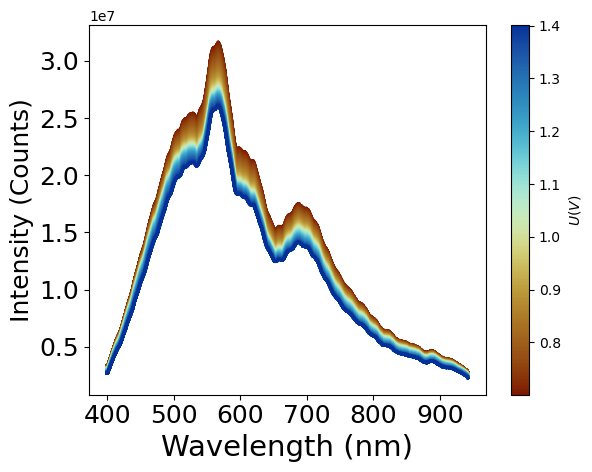

In [111]:
  # Assuming sp is the module where plot_DOD is defined

Int_data = SpEC1.spec_scans_downsampled[1]['Anodic']

# Declare int_data as a deep copy of Int_data
int_data = Int_data.copy(deep=True)
# Add 0.26 to the column names of int data
int_data.columns = int_data.columns.astype(float) + 0.26

def change_y_axis_label(new_label):
    def decorator(plot_func):
        def wrapper(*args, **kwargs):
            plot_func(*args, **kwargs)
            plt.ylabel(new_label)
            # Attempt to add a color bar if a mappable object exists
            try:
                plt.colorbar(label=r'$V_{Ag/AgCl}$')
            except RuntimeError:
                pass
        return wrapper
    return decorator

# Define a wrapper function for sp.plot_DOD
@change_y_axis_label('Intensity (Counts)')
def plot_DOD_with_new_label(*args, **kwargs):
    return sp.plot_DOD(*args, **kwargs)

# Use the wrapper function to plot the data
plot_DOD_with_new_label(int_data)
int_data

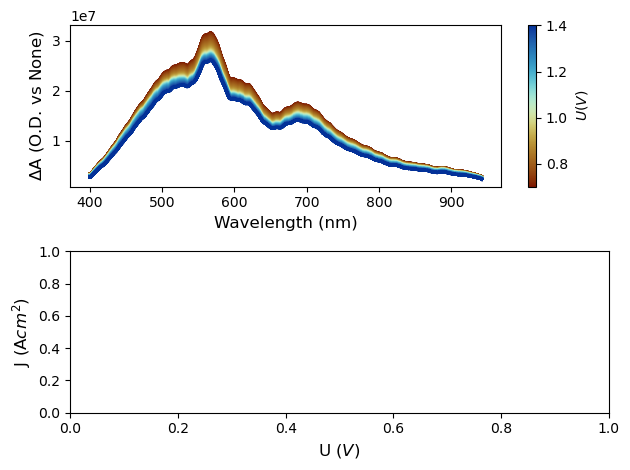

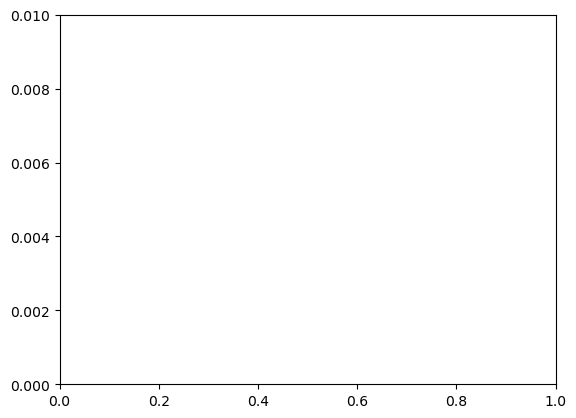

In [112]:
# create a decorator function that will change the y axis min and max values of axis 2 of a sp.Co_plot_DOD_and_CV
def change_y_axis_min_max(new_min, new_max):
    def decorator(plot_func):
        def wrapper(*args, **kwargs):
            plot_func(*args, **kwargs)
            plt.gca().set_ylim([new_min, new_max])
        return wrapper
    return decorator

# Define a wrapper function for sp.Co_plot_DOD_and_CV
@change_y_axis_min_max(0, 0.01)
def plot_DOD_and_CV_with_new_y_axis(*args, **kwargs):
    sp.Co_plot_DOD_and_CV(*args, **kwargs)

# Use the wrapper function to plot the data
plot_DOD_and_CV_with_new_y_axis(int_data, SpEC1.CV_scans[1]['Anodic'])



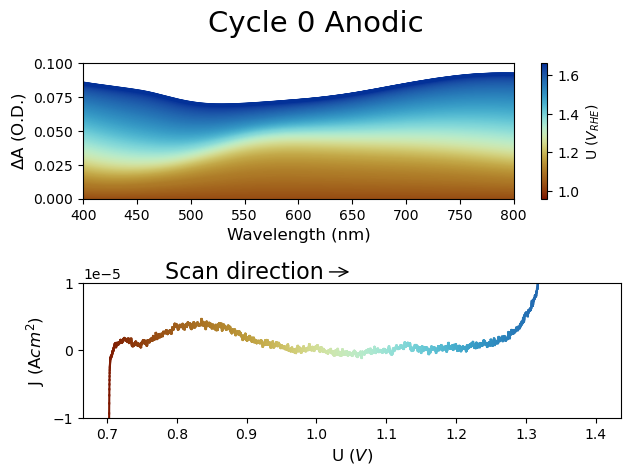

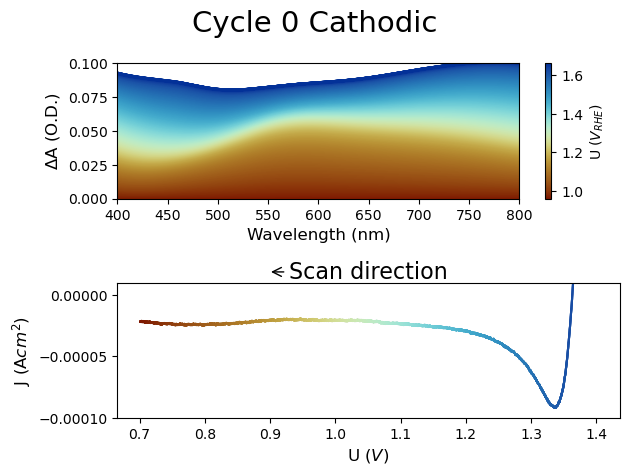

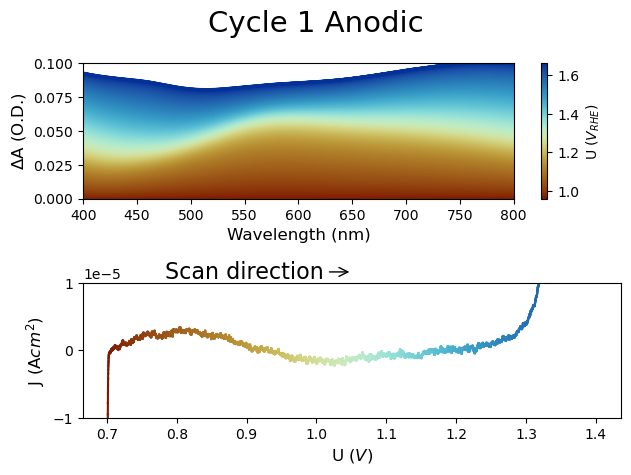

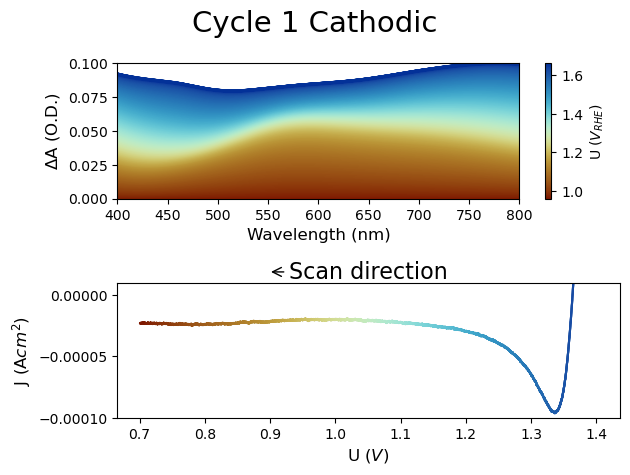

In [113]:


for key, value in SpEC1.CV_scans.items():

        for key2, value2 in value.items():
            # get the scan then apply a sgolay filter to the data
            CV=SpEC1.CV_scans[key][key2].apply(lambda x: signal.savgol_filter(x, 21, 3))
            if key2 == 'Anodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, 0.4, 101)
                ref=ref+0.26
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                        Title=f'Cycle {key} {key2}',
                                          y_max=0.1, y_min=-0.0,
                                          y2_max=0.00001, y2_min=-0.00001,
                                            x_min=400, x_max=800,
                                              reference_potential=f"$ {ref}V_{{RHE}}$",
                                                scan_direction=key2,
                                                  cmap_option=cmc.roma,
                                                  colour_bar_label=r'U ($V_{RHE}$)',
                                                  referance_electrode_correction=0.26)
            elif key2 == 'Cathodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, 0.4, 101)
                ref=ref+0.26
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                        Title=f'Cycle {key} {key2}',
                                          y_max=0.1, y_min=-0.0,
                                          y2_max=0.00001, y2_min=-0.0001,
                                            x_min=400, x_max=800,
                                              reference_potential=f"$ {ref}V_{{RHE}}$",
                                                scan_direction=key2,
                                                  cmap_option=cmc.roma,
                                                  colour_bar_label=r'U ($V_{RHE}$)',
                                                  referance_electrode_correction=0.26)

            #plt.savefig(os.path.join(full_output_path, f'Cycle_{key}_{key2}.png'))
            plt.close() 

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Residuals Spectra'}, xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ 0.7V_{RHE}$)'>)

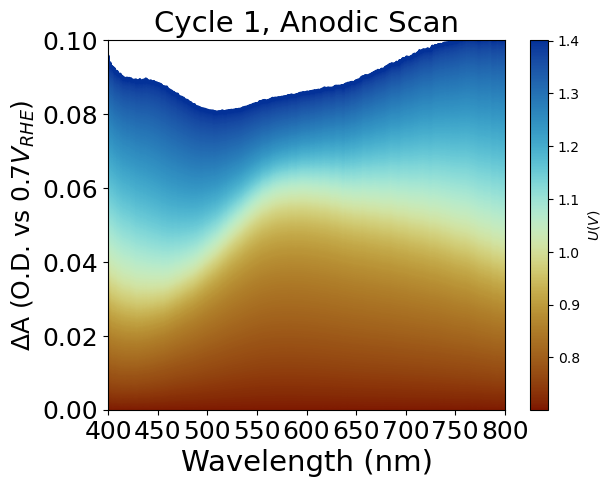

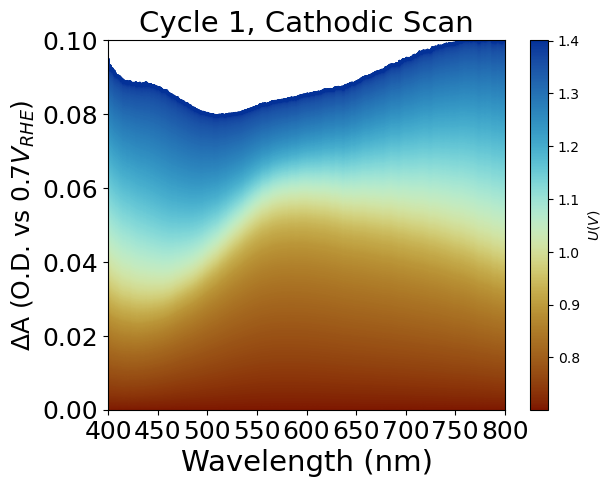

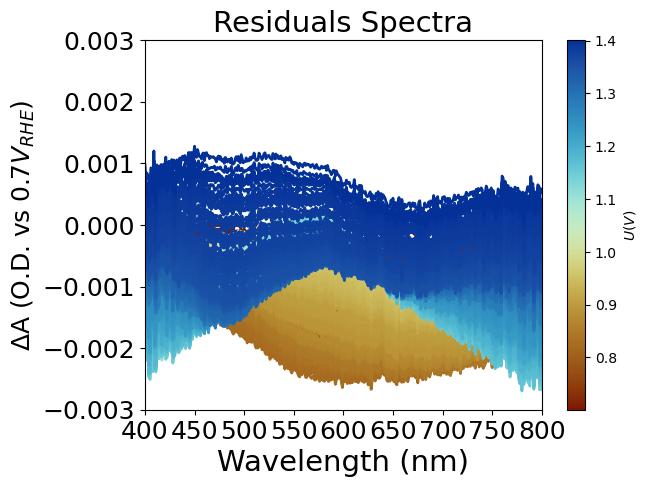

In [114]:
data, ref=sp.calculateDOD(SpEC1, 1, 'Anodic', 0.44, 0)
ref2=ref+0.26
data.columns = data.columns.astype(float) + 0.26

sp.plot_DOD(data, y_max=0.1, y_min=-0, x_min=400, x_max=800, reference_potential=f"$ {ref2}V_{{RHE}}$", Title='Cycle 1, Anodic Scan' )


data2, ref=sp.calculateDOD(SpEC1, 1, 'Cathodic', 0.44, 0)
ref2=ref+0.26
data2.columns = data2.columns.astype(float) + 0.26
sp.plot_DOD(data2, y_max=0.1, y_min=-0, x_min=400, x_max=800, reference_potential=f"$ {ref2}V_{{RHE}}$", Title='Cycle 1, Cathodic Scan' )

# subtract data2 from data and plot with the title residuals spectra
residuals=(data-data2)

sp.plot_DOD(residuals, y_max=0.003, y_min=-0.003, x_min=400, x_max=800, reference_potential=f"$ {ref2}V_{{RHE}}$", Title='Residuals Spectra' )

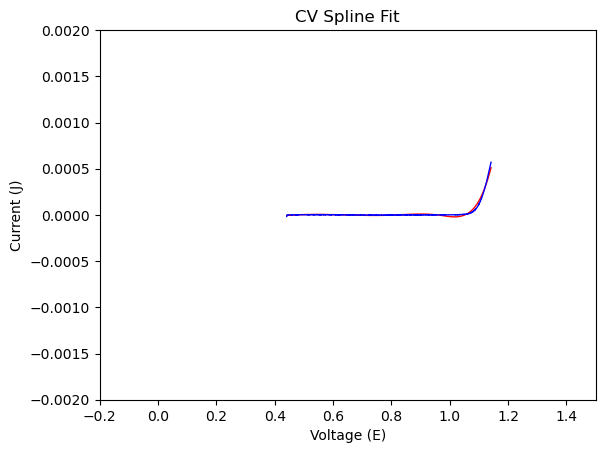

array(-0.0006892)

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline


test=SpEC1.CV_scans[1]['Anodic']
# Extract current and voltage data from the DataFrame
J = test.iloc[:, 2]
E = test.iloc[:, 1]

# Sort the data by voltage
sorted_indices = np.argsort(E)
E_sorted = E.iloc[sorted_indices]
J_sorted = J.iloc[sorted_indices]

# Fit the CV to a spline function
spl = UnivariateSpline(E_sorted, J_sorted)
spl.set_smoothing_factor(0.000001)

# Plot the spline function
plt.plot(E_sorted, spl(E_sorted), 'r', lw=1)

# Plot the original data
plt.plot(E_sorted, J_sorted, 'b', lw=1) 
plt.xlabel('Voltage (E)')
plt.ylabel('Current (J)')
plt.title('CV Spline Fit')
# set the x range from -0.2 to 1.5
plt.xlim(-0.2, 1.5)

# set the y range from -0.002 to 0.002
plt.ylim(-0.002, 0.002)

plt.show()

# use the spline function to calculate the current at a specific voltage
spl(0.)





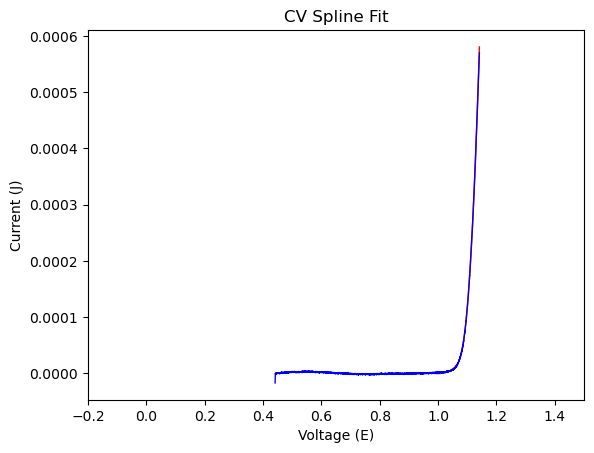

In [116]:
sp.fit_current_to_univariate_spline(J=J,U=E, smoothing_factor=0.00000001)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'new instrument'}, xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $\\delta 20 mV, Norm$)'>)

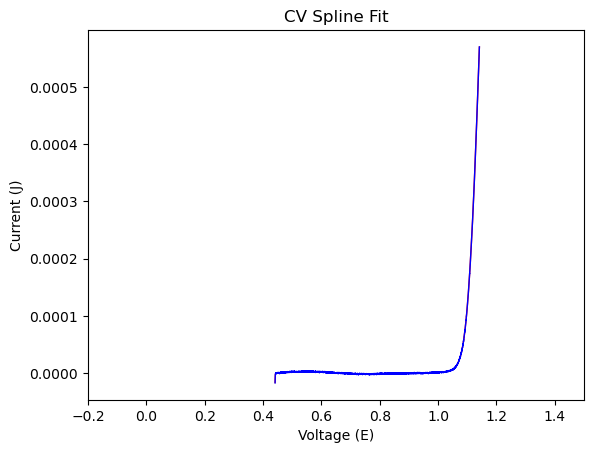

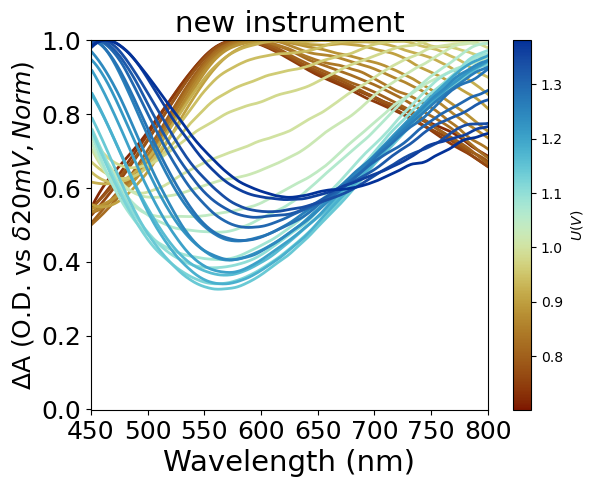

In [117]:
data0, ref=sp.calculateDOD(SpEC1, 1, 'Anodic', -1, 21)

data=data0.copy(deep=True)

# remove data less than 420 nm and greater than 850 nm
data=data[(data.index>450) & (data.index<850)]

data=sp.iR_correct_spectrum(data, J, E, 0.42)

# add 0.26 to the column names of data

data.columns = data.columns.astype(float) + 0.26

data_diff=sp.calculate_differential_spectra(DOD_dataframe=data, voltage_step=0.02, smooth_strength=51, Normalise=True)

sp.plot_DOD(data_diff, y_max=1, y_min=-0.001, x_min=450, x_max=800, reference_potential=f"$\delta 20 mV, Norm$", Title='new instrument' )

# import the literature benchmark


True


0.400     0.401     0.402     0.403     0.404     0.405     0.406  \
0.0                                                                            
449.73929   -0.0  0.000422 -0.000193 -0.000187 -0.000285  0.000340  0.000132   
450.16129   -0.0 -0.000042 -0.000160  0.000174  0.000408  0.000382  0.000969   
450.58331   -0.0 -0.000058 -0.000554  0.000518  0.000131  0.000063  0.000445   
451.00531   -0.0 -0.000632 -0.000703 -0.000944 -0.000325 -0.000488 -0.000441   
451.42731   -0.0  0.000350 -0.000162  0.000617  0.000704  0.000405  0.000829   
...          ...       ...       ...       ...       ...       ...       ...   
872.06238   -0.0 -0.000201 -0.000040  0.000111  0.000186  0.000348  0.000272   
872.46692   -0.0 -0.000101  0.000166  0.000340  0.000659  0.000535  0.000759   
872.87140   -0.0  0.000190  0.000300  0.000300  0.000667  0.000494  0.000828   
873.27588   -0.0  0.000136  0.000058  0.000417  0.000417  0.000521  0.000688   
873.68030   -0.0 -0.000042  0.000134 -0.000126  0.000273  0.000635  0.000298   

              0.407     0.408     0.409  ...     1.490     1.491     1.492  \
0.0                                      ...                                 
449.73929  0.000121  0.000504  0.000771  ...  0.143045  0.142301  0.144043   
450.16129  0.000484  0.000358  0.000569  ...  0.143014  0.142648  0.143219   
450.58331  0.000313  0.000131  0.000447  ...  0.143038  0.142381  0.143539   
451.00531 -0.000360 -0.000160 -0.000008  ...  0.142279  0.141969  0.142501   
451.42731  0.000808  0.000939  0.001065  ...  0.142802  0.142442  0.143511   
...             ...       ...       ...  ...       ...       ...       ...   
872.06238  0.000442  0.000498  0.000558  ...  0.188041  0.187647  0.189417   
872.46692  0.000941  0.000854  0.000823  ...  0.188298  0.188237  0.189084   
872.87140  0.000871  0.000936  0.001244  ...  0.188610  0.188226  0.189513   
873.27588  0.000692  0.001041  0.000926  ...  0.188295  0.187926  0.189390   
873.68030  0.000623  0.000699  0.000735  ...  0.188158  0.188171  0.189188   

              1.493     1.494     1.495     1.496     1.497     1.498  \
0.0                                                                     
449.73929  0.143445  0.144054  0.142466  0.144146  0.144867  0.145302   
450.16129  0.143314  0.144527  0.143332  0.144898  0.144113  0.144263   
450.58331  0.143020  0.144063  0.142812  0.144294  0.144272  0.144096   
451.00531  0.142108  0.143019  0.141755  0.143556  0.143487  0.143991   
451.42731  0.143169  0.143940  0.143216  0.144188  0.144716  0.145264   
...             ...       ...       ...       ...       ...       ...   
872.06238  0.188034  0.188876  0.187935  0.190114  0.190098  0.190831   
872.46692  0.188751  0.189708  0.188487  0.190473  0.190705  0.191059   
872.87140  0.188870  0.189715  0.188087  0.190512  0.190273  0.190963   
873.27588  0.188357  0.189601  0.188229  0.190509  0.190565  0.191107   
873.68030  0.188407  0.189140  0.187911  0.190325  0.190243  0.190486   

              1.499  
0.0                  
449.73929  0.144544  
450.16129  0.145071  
450.58331  0.145083  
451.00531  0.143999  
451.42731  0.145088  
...             ...  
872.06238  0.190644  
872.46692  0.191116  
872.87140  0.191028  
873.27588  0.191176  
873.68030  0.190629  

[1022 rows x 1100 columns]

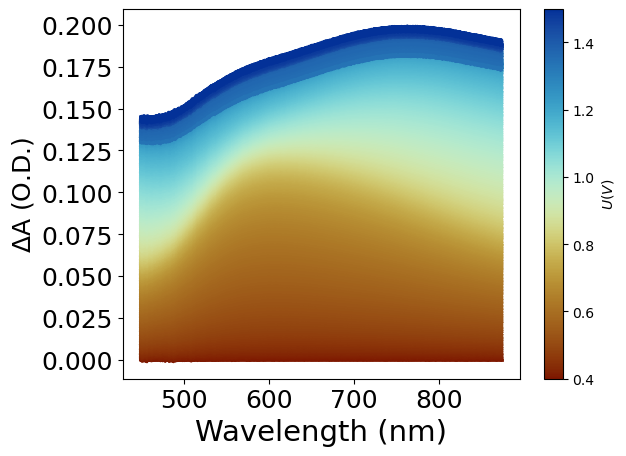

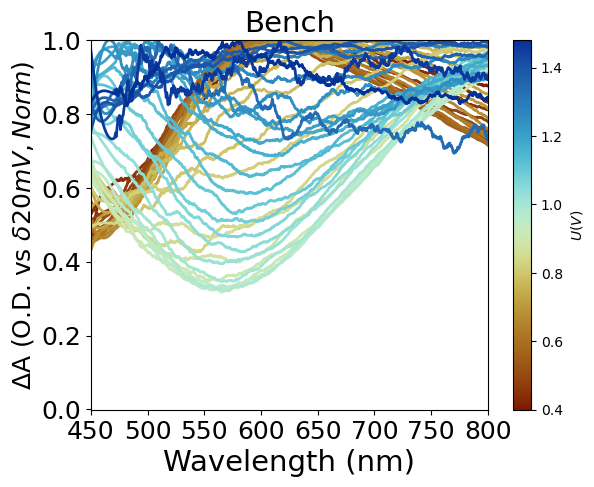

In [128]:
I_bench=pd.read_csv('/Users/benj/Documents/IrBenchmark/Caiwudata/full-data/test-7SEC.csv')

I_bench.columns=I_bench.columns.values.astype(float)

# set the first column as the index and then drop the first column
I_bench.set_index(I_bench.columns[0], inplace=True)



DOD_bench = I_bench.apply(lambda x: -np.log10(x / I_bench.iloc[:, 0]), axis=0)
check=-np.log10((I_bench.iloc[:,1])/(I_bench.iloc[:,0]))

print(np.allclose(DOD_bench.iloc[:,1], check))


sp.plot_DOD(DOD_bench);

DOD_bench_diff=sp.calculate_differential_spectra(DOD_dataframe=DOD_bench, voltage_step=0.02, smooth_strength=101, Normalise=True)

sp.plot_DOD(DOD_bench_diff, y_max=1, y_min=-0.001, x_min=450, x_max=800, reference_potential=f"$\delta 20 mV, Norm$", Title='Bench' )

DOD_bench

In [107]:
SpEC1.Andorspec.shape

(274520, 2560)

Text(0.5, 0, 'Wavelength (nm)')

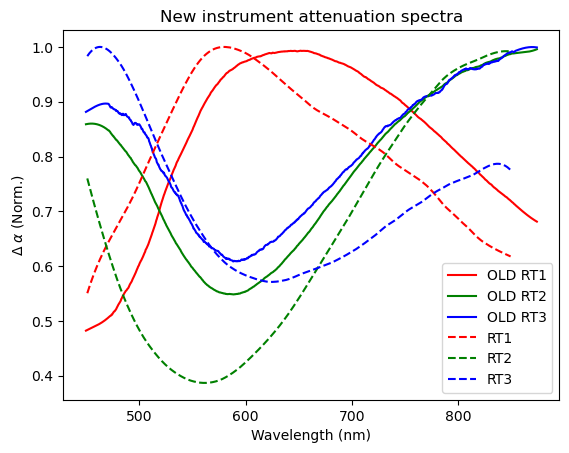

In [142]:
alphaB1=sp.extract_average_spectrum_in_voltage_window(DOD_bench_diff, 0.4+0.26, 0.48+0.26)
alphaB2=sp.extract_average_spectrum_in_voltage_window(DOD_bench_diff, 0.8+0.26, 0.9+0.26)
alphaB3=sp.extract_average_spectrum_in_voltage_window(DOD_bench_diff, 0.85+0.26, 0.9+0.26)

plt.plot(alphaB1.index, alphaB1.values, label='OLD RT1', color='red')
plt.plot(alphaB2.index, alphaB2.values, label='OLD RT2', color='green')
plt.plot(alphaB3.index, alphaB3.values, label='OLD RT3', color='blue')

plt.legend()

# combine alpha1, alpha2 and alpha3 into a single dataframe
alphas=pd.concat([alphaB1, alphaB2, alphaB3], axis=1)

plt.title('Old instrument attenuation spectra')

# axis is $\Delta$ $\alpha$ (Norm.)

plt.ylabel(r'$\Delta$ $\alpha$ (Norm.)')

# x axis is Wavelength (nm)

plt.xlabel('Wavelength (nm)')


alpha1=sp.extract_average_spectrum_in_voltage_window(data_diff, 0.4+0.26, 0.48+0.26)
alpha2=sp.extract_average_spectrum_in_voltage_window(data_diff, 0.8+0.26, 0.9+0.26)
alpha3=sp.extract_average_spectrum_in_voltage_window(data_diff, 1.1+0.26, 1.15+0.26)

plt.plot(alpha1.index, alpha1.values, label='RT1', linestyle='--', color='red')
plt.plot(alpha2.index, alpha2.values, label='RT2',linestyle='--', color='green')
plt.plot(alpha3.index, alpha3.values, label='RT3',linestyle='--', color='blue')

plt.legend()

# combine alpha1, alpha2 and alpha3 into a single dataframe
alphas=pd.concat([alpha1, alpha2, alpha3], axis=1)
# title of the plot is 'new sample attenuation spectra'

plt.title('New instrument attenuation spectra')

# axis is $\Delta$ $\alpha$ (Norm.)

plt.ylabel(r'$\Delta$ $\alpha$ (Norm.)')

# x axis is Wavelength (nm)

plt.xlabel('Wavelength (nm)')

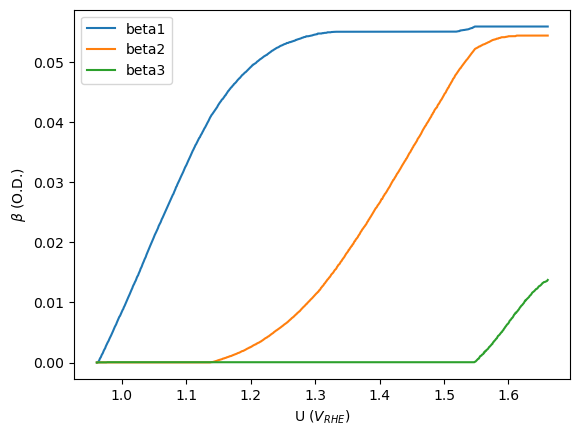

In [132]:
import numpy as np
import pandas as pd
from scipy.optimize import lsq_linear
import matplotlib.pyplot as plt

def fit_dod_to_beta_spectra(dod_df, *betas):
    betas_matrix = np.vstack(betas).T  # Stack beta spectra into a matrix
    num_betas = len(betas)
    fitted_alphas = []
    initial_guess = np.zeros(num_betas)
    lower_bounds = np.zeros(num_betas)  # Initial lower bounds are zeros
    upper_bounds = np.inf  # Upper bounds are infinity
    
    for i, column in enumerate(dod_df.columns):
        y = dod_df[column].values
        bounds = (lower_bounds, upper_bounds)
        result = lsq_linear(betas_matrix, y, bounds=bounds, lsmr_tol='auto')
        fitted_alphas.append(result.x)
        lower_bounds = result.x  # Update lower bounds for the next iteration
        
    return pd.DataFrame(fitted_alphas, columns=[f'beta{i+1}' for i in range(num_betas)], index=dod_df.columns)

# Fit the DOD data to the beta spectra
fit = fit_dod_to_beta_spectra(data, alpha1, alpha2, alpha3)
# Example usage:
# dod_df = pd.DataFrame(...)  # Your DOD dataframe
# beta1 = np.array(...)  # Your first beta spectrum
# beta2 = np.array(...)  # Your second beta spectrum
# fit = fit_dod_to_beta_spectra(dod_df, beta1, beta2)
# Plot fit against the index of fit
for column in fit.columns:
    plt.plot(fit.index+0.26, fit[column], label=column)
plt.legend()

# set the y label to $\beta$ (O.D.)
plt.ylabel(r'$\beta$ (O.D.)')
# set the x label to U (V vs Ag/AgCl)
plt.xlabel('U ($V_{RHE})$')
plt.show()


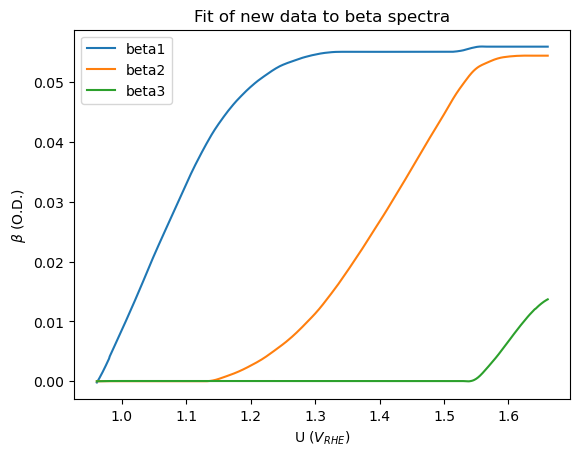

In [133]:
from scipy.signal import savgol_filter

# Smooth the beta spectra using Savitzky-Golay filter
window_length = 40  # Choose an odd number
polyorder = 3
smoothed_fit = fit.apply(lambda x: savgol_filter(x, window_length, polyorder), axis=0)

# make a deep copy of smmothed_fit and add 0.26 to the index of the smoothed_fit
smoothed_fit2=smoothed_fit.copy(deep=True)
smoothed_fit2.index=smoothed_fit2.index+0.26

# # Plot the smoothed beta spectra
for column in smoothed_fit.columns:
    plt.plot(smoothed_fit2.index, smoothed_fit[column], label=column)
plt.legend()

# set the y label to $\beta$ (O.D.)
plt.ylabel(r'$\beta$ (O.D.)')
# set the x label to U (V vs Ag/AgCl)
plt.xlabel('U ($V_{RHE})$')
# title of plot - fit of new data to beta spectra
plt.title('Fit of new data to beta spectra')

plt.show()



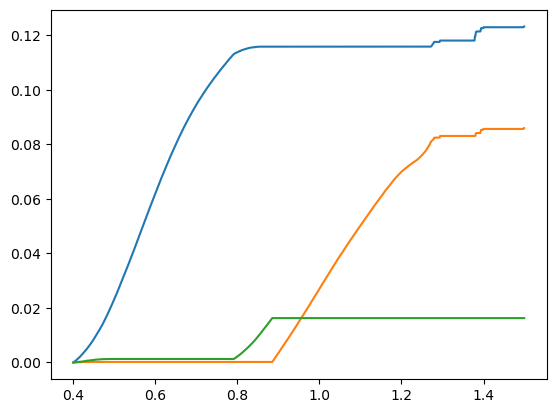

In [143]:
# fit the data in benchmark  to alphaB1, alphaB2 and alphaB3

fit_benchmark = fit_dod_to_beta_spectra(DOD_bench, alphaB1, alphaB2, alphaB3)

# Plot fit against the index of fit
for column in fit_benchmark.columns:
    plt.plot(fit_benchmark.index, fit_benchmark[column], label=column)

    

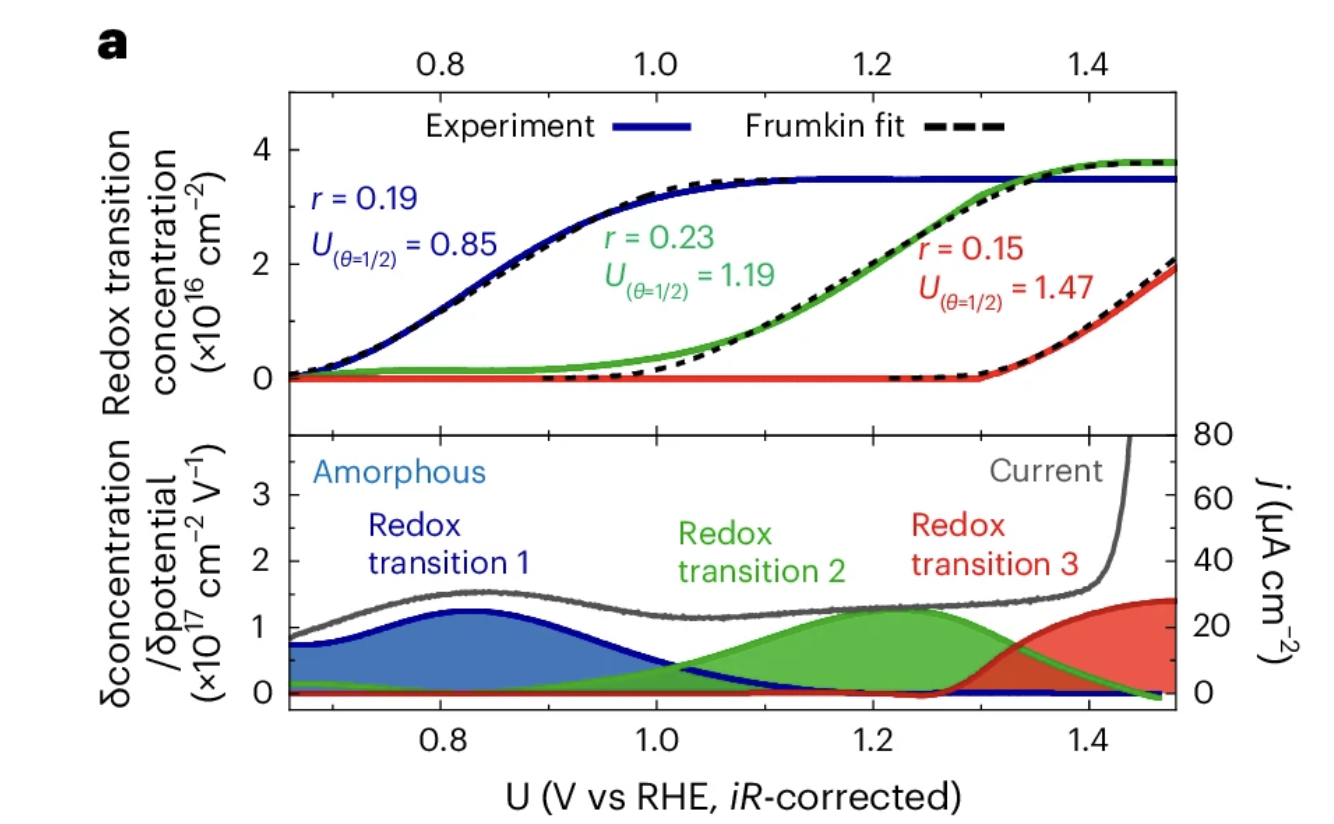

In [ ]:
# multiply the betas at each potential by the alpha values to get the DOD values

print(fit.shape, alphas.shape)

# create a new dataframe with the same index and collumns as data
# multiplt fit by alpha.T using np.outer
dod_fit = pd.DataFrame(alphas.values @ fit.values.T)
#set the index and collumns of the new dataframe to be the same as data
dod_fit.index = data.index
dod_fit.columns = data.columns
sp.plot_DOD(dod_fit)


# calculate the residuals between the DOD data and the fit
residuals = data - dod_fit

# plot the residuals
sp.plot_DOD(residuals, y_max=0.005, y_min=-0.005, x_min=400, x_max=800, reference_potential=f"$\delta 5 mV$")

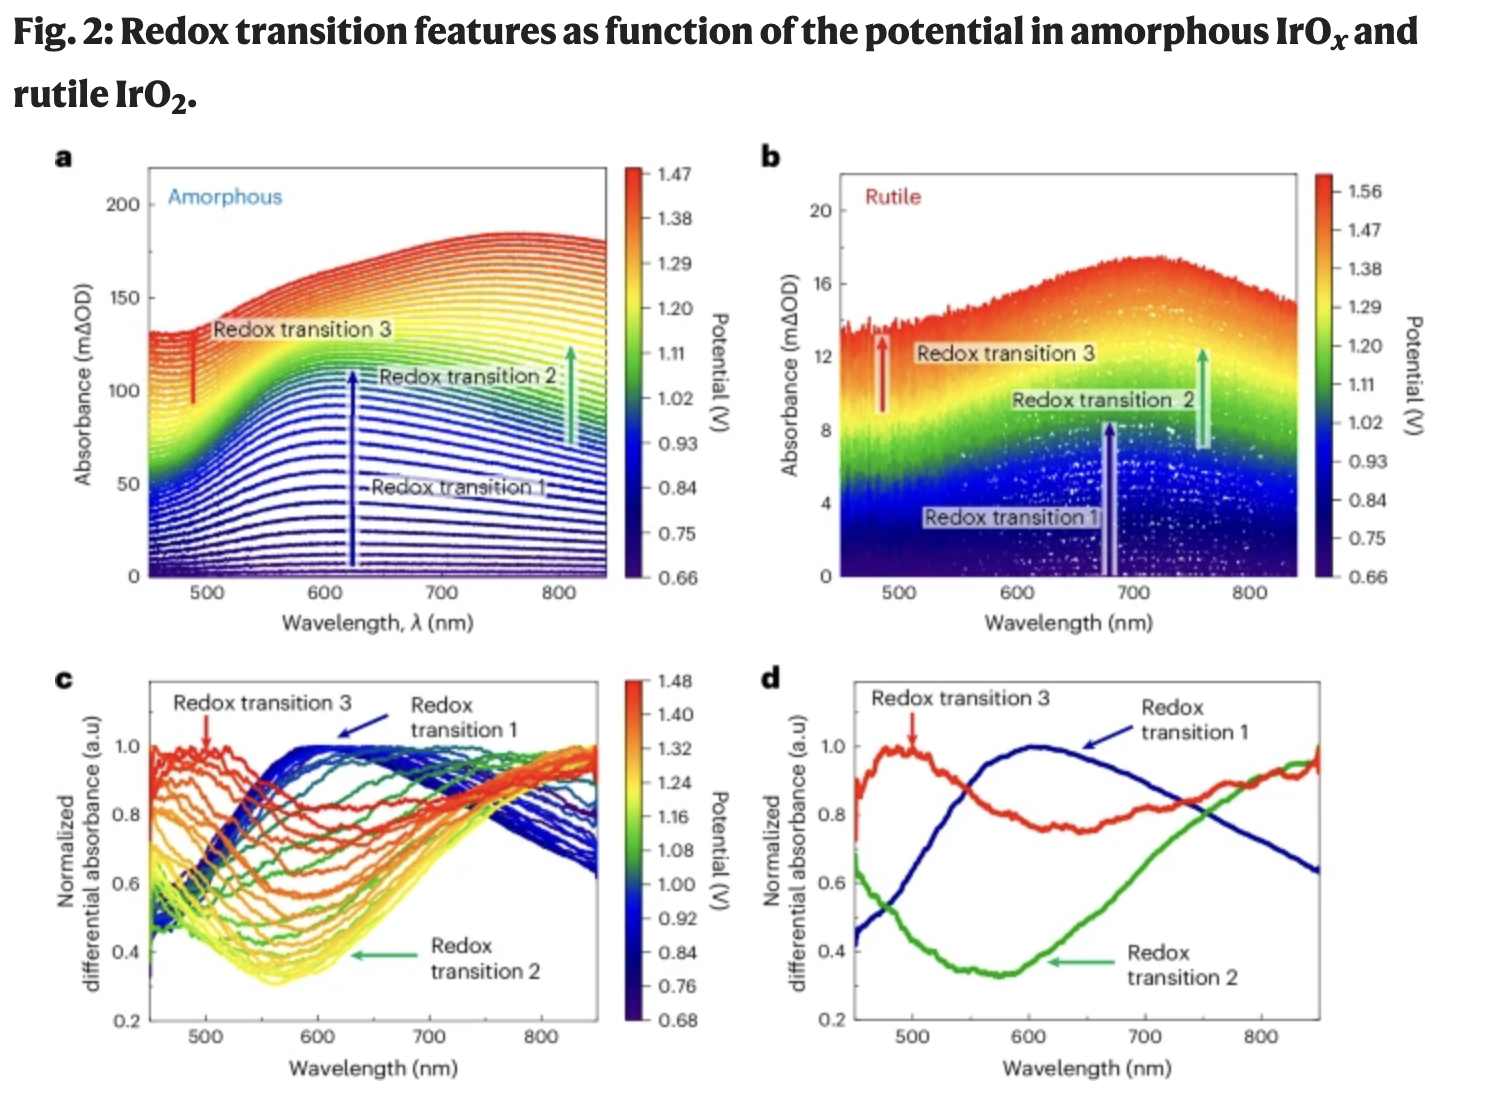